# Dataset Split

Since we think about extracting features from images in addition to the images themselves, we will separate the data as follows:

* 10% will correspond to test data, which will not be accessed by the model in training, only during the test phase.

The remaining 90% of the data will be divided into:

* Training Phase - 50% of the remaining data (45% of the total data) will correspond to the training data, which will be used to train the different models.

* Validation Phase - 25% of the remaining data (22.5% of the total data) for validation and comparison of the different models so that we can choose one for the optimization phase.

* Optimization Phase - 25% of the remaining data (22.5% of the total data) for Baysian Optimization. We will use this data to choose the hyperparameters of the best model obtained during validation phase.

This division of the training data allows an unbiased evaluation of the different models during the transformer construction stages.

# Importing libraries

In [ ]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Downloading the Dataset

Considering we are in **ViT-for-Dark-Matter-Morphology/src/notebooks** directory, we can do:

In [ ]:
images_path = os.path.join('..','..','data','original','lenses.tgz')

In [ ]:
!tar -xvzf  {images_path}

A saída de streaming foi truncada nas últimas 5000 linhas.
lenses/sub/image_100015241301657914033614173596761104525.jpg
lenses/sub/image_100019258133324150161414627571840489791.jpg
lenses/sub/image_100037595382723842062692422633464214182.jpg
lenses/sub/image_100051752665265895059841674396483507971.jpg
lenses/sub/image_100061050381335122405719538882377792147.jpg
lenses/sub/image_100197909896237775032543464299896775969.jpg
lenses/sub/image_100320807541648655929202108326967225168.jpg
lenses/sub/image_100328038748633664502728939498999939178.jpg
lenses/sub/image_100414429896197675867404359083606673007.jpg
lenses/sub/image_100417428819094526025015583687314128031.jpg
lenses/sub/image_100420135487186127075592600341613352821.jpg
lenses/sub/image_100421750518816277824738277767206924323.jpg
lenses/sub/image_100462348085513038268081370949998047036.jpg
lenses/sub/image_100466995792859747756314577205445431577.jpg
lenses/sub/image_1004743667648648993666680301317488948.jpg
lenses/sub/image_10049396297

# Open the data

Let's declare the path to the data files:

In [ ]:
sub_path = "/sub"
no_sub_path = "/no_sub"

In [ ]:
sub_images = [cv2.imread(file) for file in glob.glob(sub_path + '/'+"*.jpg")]
no_sub_images = [cv2.imread(file) for file in glob.glob(no_sub_path + '/'+"*.jpg")]

Let's create the total dataset:

In [ ]:
# Initializing empty lists for X and y
X, y = [], []

# Looping through the non-sub images
for image in no_sub_images:
    # Appending a numpy array of [1,0] to y for each non-sub image
    y.append(np.array([1,0]))

# Looping through the sub images
for image in sub_images:
    # Appending a numpy array of [0,1] to y for each sub image
    y.append(np.array([0,1]))

# Converting y to a numpy array and casting it to float32
y = np.array(y)
y = y.astype(np.float32)

# Concatenating sub_images and no_sub_images into a single numpy array for X
X = np.array([*no_sub_images,*sub_images])

# Dividing the values of X by 255 to normalize the pixel values between 0 and 1
X = X[:,:,:,0]/255

Let's visualize the first image to see if the opening process was correct:

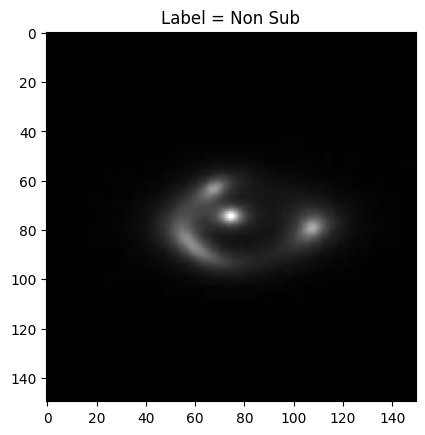

In [ ]:
label = np.argmax(y[0])
label = 'Sub' if label else "Non Sub"
plt.title(f'Label = {label}')
plt.imshow(X[0],cmap='gray')
plt.show()

# Splitting the Data

Shuffle the data:

In [ ]:
X_total_training, X_test, y_total_training, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=2023)

Using the previous rules:

In [ ]:
# Calculating the total number of samples in the total training set
total_training_samples = len(X_total_training)

# Selecting the first 50% of the samples in the total training set for training
X_train = X_total_training[ : int(0.5*total_training_samples) ]
y_train = y_total_training[ : int(0.5*total_training_samples) ]

# Selecting the next 25% of the samples in the total training set for validation
X_valid = X_total_training[ int(0.5*total_training_samples): int(0.75*total_training_samples) ]
y_valid = y_total_training[ int(0.5*total_training_samples): int(0.75*total_training_samples) ]

# Selecting the remaining 25% of the samples in the total training set for optimization
X_opt = X_total_training[ int(0.75*total_training_samples): ]
y_opt = y_total_training[ int(0.75*total_training_samples):  ]

# Saving the data

In [ ]:
X_file_names = {'X_train.npy': X_train ,'X_valid.npy': X_valid,'X_opt.npy': X_opt,'X_test.npy': X_test}
y_file_names = {'y_train.npy': y_train ,'y_valid.npy': y_valid,'y_opt.npy': y_opt,'y_test.npy': y_test}

X_folder = os.path.join('..','..','data','splitted','images')
y_folder = os.path.join('..','..','data','splitted','labels')

for file_name, data in X_file_names.items():
  with open(os.path.join(X_folder,file_name), 'wb') as f:
      np.savez_compressed(f, data=data)

for file_name, label in y_file_names.items():
  with open(os.path.join(y_folder,file_name), 'wb') as f:
      np.savez_compressed(f, label=label)